## Proper Analysis of Optical-Thermal Properties of DC by Census Tract

Need to:
- Study how the land use data is presented
- Give a reliable measure of surface land use for each census block
- Translate surface land use to an average albedo for the block
- Implement the model used before and discuss correlations between modeled and measured thermal properties

In [1]:
# necessary imports

import numpy as np
import pandas as pd

In [2]:
# bring in emissivity/land use data

data = pd.read_excel('ZonalSt_13_TableToExcel.xlsx', index_col = 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID')
data.head()

,ZonalSt_13.OBJECTID,ZonalSt_13.GEOID20,ZonalSt_13.ZONE_CODE,ZonalSt_13.COUNT,ZonalSt_13.AREA,ZonalSt_13.MEAN,ZonalSt_13.STD,L1Urban_Tree_Canopy_by_Census_Block_in_2020.OBJECTID,L1Urban_Tree_Canopy_by_Census_Block_in_2020.STATEFP20,L1Urban_Tree_Canopy_by_Census_Block_in_2020.COUNTYFP20,...,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCAC1120,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCPCT1120,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_AC_15,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_PCT_15,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCAC1520,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCPCT1520,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GIS_ID,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GLOBALID,SHAPE.AREA,SHAPE.LEN
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,,,,,,,,,,,,,,,,,,,
4227,1,110010016004000,1,49,44100,0.976003,0.008009,1,11,1,...,-0.56,-5.287320,5.32,49.859419,-0.27,-2.569419,UTC_BlockPly_2020_4227,{93900AAC-7225-49D3-831A-D41D1132A0BD},0,0
4359,2,110010016004004,2,80,72000,0.986844,0.004065,2,11,1,...,-1.44,-8.265744,14.76,84.778863,-0.53,-3.038863,UTC_BlockPly_2020_4359,{CDF979AE-F8E6-4B74-B6AE-66DC7E4A674A},0,0
3545,3,110010016004001,3,42,37800,0.975301,0.004815,3,11,1,...,-0.77,-7.870571,3.43,34.964322,0.14,1.405678,UTC_BlockPly_2020_3545,{DBF7BACC-1E6B-4EF6-9B1D-B687839A71D3},0,0
508,4,110010016004003,4,31,27900,0.978060,0.005699,4,11,1,...,0.04,0.578471,2.33,36.349454,0.16,2.450546,UTC_BlockPly_2020_508,{25AC2541-A6DA-44B9-9D24-C180B596D5A4},0,0
78,5,110010016004002,5,23,20700,0.971958,0.003713,5,11,1,...,-0.38,-8.074759,1.03,21.593291,0.14,2.826709,UTC_BlockPly_2020_78,{66EDF9C5-B0A2-4300-9A84-FEF3D6DF01F8},0,0


In [3]:
data.shape

(5969, 76)

In [4]:
list(data.columns)

['ZonalSt_13.OBJECTID',
 'ZonalSt_13.GEOID20',
 'ZonalSt_13.ZONE_CODE',
 'ZonalSt_13.COUNT',
 'ZonalSt_13.AREA',
 'ZonalSt_13.MEAN',
 'ZonalSt_13.STD',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.OBJECTID',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.STATEFP20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.COUNTYFP20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.TRACTCE20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.BLOCKCE20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.GEOID20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.NAME20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.MTFCC20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.FUNCSTAT20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.ALAND20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.AWATER20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.INTPTLAT20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.INTPTLON20',
 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.TOTAL_AC',
 'L1Urban_Tree_Canopy_by_Census_Block_in_202

In [5]:
#finding which land use constitutes the entire 100 percent.

prefix = 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.'
notable_suffixes = ['TCAN_PCT',
                   'VEG_PCT',
                   'BLD_PCT',
                   'ROAD_PCT',
                   'SWALK_PCT',
                   'WAT_PCT',
                   'SOIL_PCT']
notable_names = [prefix+suffix for suffix in notable_suffixes]
land_use_pcts = data[notable_names]
land_use_pcts.head()

,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.BLD_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.ROAD_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.SWALK_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.SOIL_PCT
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,,,,,
4227,47.29,24.21,12.93,8.78,0.32,0.000000,0.0
4359,80.70,9.75,0.00,7.39,0.36,1.264315,0.0
3545,36.37,31.74,17.10,8.75,0.00,0.000000,0.0
508,38.80,33.27,11.89,11.45,0.00,0.000000,0.0
78,24.42,37.54,16.93,14.31,0.00,0.000000,0.0


In [6]:
land_use_pcts['total'] = land_use_pcts.sum(axis = 1)
land_use_pcts.total.head()

<ipython-input-6-0ddf83c4915d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_use_pcts['total'] = land_use_pcts.sum(axis = 1)


L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID
4227    93.530000
4359    99.464315
3545    93.960000
508     95.410000
78      93.200000
Name: total, dtype: float64

In [7]:
max_val = np.max(land_use_pcts.total)
max_val

100.01

In [8]:
min_val = np.min(land_use_pcts.total)
min_val

5.989999999999999

In [9]:
min_block = land_use_pcts.loc[lambda df: df['total'] == min_val]
min_block

,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.BLD_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.ROAD_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.SWALK_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.SOIL_PCT,total
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,,,,,,
3517,1.17,0.26,4.22,0.2,0.14,0.0,0.0,5.99


In [10]:
max_block = land_use_pcts.loc[lambda df: df['total'] == max_val]
max_block

,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.BLD_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.ROAD_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.SWALK_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.SOIL_PCT,total
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,,,,,,
1685,6.72,0.0,0.0,93.25,0.04,0.0,0.0,100.01
673,12.78,0.0,0.0,87.06,0.17,0.0,0.0,100.01


In [11]:
min_block_full = data[[col for col in data.columns if 'PCT' in col]].iloc[3015]
min_block_full

L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT      34.760000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT        2.440000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.BLD_PCT        0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT     62.800000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.ROAD_PCT      60.760000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PLOT_PCT       0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SWALK_PCT      1.220000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.OT_IA_PCT      0.810000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT        0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SOIL_PCT       0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_PCT       34.760000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_V_PCT      2.440000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_PPA_PCT     3.670000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_IA_PCT     1.220000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UN_V

In [12]:
max_block_full = data[[col for col in data.columns if 'PCT' in col]].iloc[[1662, 1958]]

In [13]:
max_block_full.iloc[0]

L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT      16.960000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT        5.640000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.BLD_PCT       35.950000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT     77.400000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.ROAD_PCT      26.870000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PLOT_PCT       0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SWALK_PCT      6.190000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.OT_IA_PCT      8.390000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT        0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SOIL_PCT       0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_PCT       16.960000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_V_PCT      5.640000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_PPA_PCT    11.820000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_IA_PCT     6.190000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UN_V

In [14]:
max_block_full.iloc[1]

L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT      44.260000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT        4.670000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.BLD_PCT       25.610000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT     51.070000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.ROAD_PCT      10.900000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PLOT_PCT       2.980000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SWALK_PCT      2.410000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.OT_IA_PCT      9.160000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT        0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SOIL_PCT       0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_PCT       44.260000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_V_PCT      4.630000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_PPA_PCT    10.060000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_IA_PCT     5.440000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UN_V

Hypothesis: Tree Canopy, Vegetation, and Impervious Area constitute the base probability layer.

In [15]:
base_names = ['TCAN_PCT', 'VEG_PCT', 'TO_IA_PCT']
base_cols  = data[[prefix+suffix for suffix in base_names]]

In [16]:
base_cols.head()

,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,
4227,47.29,24.21,28.50
4359,80.70,9.75,8.28
3545,36.37,31.74,31.89
508,38.80,33.27,27.93
78,24.42,37.54,38.04


In [17]:
base_cols.total = base_cols.sum(axis = 1)
base_cols.total.head()

<ipython-input-17-16d77b9a067f>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  base_cols.total = base_cols.sum(axis = 1)


L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID
4227    100.00
4359     98.73
3545    100.00
508     100.00
78      100.00
dtype: float64

Not quite. Let's analyze.

In [18]:
base_cols.total.min()

0.0

In [19]:
base_cols.total.max()

100.01000000000002

The max is probably close enough to 100% for this to be an error. But need to hunt for the minimum.

In [20]:
min_val = base_cols.total.min()
min_block = base_cols.loc[lambda df: df.total == min_val]
min_block

,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,
4439,0.0,0.0,0.0
763,0.0,0.0,0.0
3901,0.0,0.0,0.0
182,0.0,0.0,0.0
2844,0.0,0.0,0.0
1002,0.0,0.0,0.0
4490,0.0,0.0,0.0
1683,0.0,0.0,0.0
4353,0.0,0.0,0.0


In [21]:
min_block_ex = data[[col for col in data.columns if 'PCT' in col]].iloc[4274]
min_block_ex

L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT        0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT         0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.BLD_PCT         0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT       0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.ROAD_PCT        0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PLOT_PCT        0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SWALK_PCT       0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.OT_IA_PCT       0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT       100.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SOIL_PCT        0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_PCT         0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_V_PCT       0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_PPA_PCT      0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_IA_PCT      0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UN_V_PCT        0.0
L1Urban_Tree_Canopy_by_Census_Block_in_2

Try now with water.

In [22]:
base_names = ['TCAN_PCT', 'VEG_PCT', 'TO_IA_PCT', 'WAT_PCT']
base_cols  = data[[prefix+suffix for suffix in base_names]]
base_cols.head()

,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,,
4227,47.29,24.21,28.50,0.000000
4359,80.70,9.75,8.28,1.264315
3545,36.37,31.74,31.89,0.000000
508,38.80,33.27,27.93,0.000000
78,24.42,37.54,38.04,0.000000


In [23]:
base_cols['total'] = base_cols.sum(axis = 1)
base_cols.total.head()

<ipython-input-23-f3a1c558c51b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_cols['total'] = base_cols.sum(axis = 1)


L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID
4227    100.000000
4359     99.994315
3545    100.000000
508     100.000000
78      100.000000
Name: total, dtype: float64

In [24]:
base_cols.total.min()

71.98

In [25]:
base_cols.total.max()

100.01242315

Another column? Let's see.

In [26]:
min_val = base_cols.total.min()
min_block = base_cols.loc[lambda df: df.total == min_val]
min_block

,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT,total
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,,,
5698,3.58,0.89,67.51,0.0,71.98


In [27]:
min_block_ex = data[[col for col in data.columns if 'PCT' in col]].iloc[3746]
min_block_ex

L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT       3.580000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT        0.890000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.BLD_PCT        3.620000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT     67.510000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.ROAD_PCT      27.620000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PLOT_PCT       0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SWALK_PCT     23.310000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.OT_IA_PCT     12.960000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT        0.000000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.SOIL_PCT      28.020000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_PCT        3.580000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_V_PCT      0.890000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_PPA_PCT    24.200000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.PPA_IA_PCT    23.310000
L1Urban_Tree_Canopy_by_Census_Block_in_2020.UN_V

NOW, add soil.

In [28]:
base_names = ['TCAN_PCT', 'VEG_PCT', 'TO_IA_PCT', 'WAT_PCT', 'SOIL_PCT']
base_cols  = data[[prefix+suffix for suffix in base_names]]
base_cols.head()

,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TCAN_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.VEG_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TO_IA_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.WAT_PCT,L1Urban_Tree_Canopy_by_Census_Block_in_2020.SOIL_PCT
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,,,
4227,47.29,24.21,28.50,0.000000,0.0
4359,80.70,9.75,8.28,1.264315,0.0
3545,36.37,31.74,31.89,0.000000,0.0
508,38.80,33.27,27.93,0.000000,0.0
78,24.42,37.54,38.04,0.000000,0.0


In [29]:
base_cols['total'] = base_cols.sum(axis = 1)
base_cols.total.head()

<ipython-input-29-f3a1c558c51b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_cols['total'] = base_cols.sum(axis = 1)


L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID
4227    100.000000
4359     99.994315
3545    100.000000
508     100.000000
78      100.000000
Name: total, dtype: float64

In [30]:
base_cols.total.min()

99.98667662000001

Ok, finally THIS we can work with.

## Land Use Breakdown

The total land use is given by
- Tree Canopy
- Vegetation
- Impervious Area
- Water
- Soil

Impervious area is split into
- Building
- Parking Lot
- Sidewalk
- Road
- Other Impervious Area

Need to give each of these an albedo. Use the table from Wikipedia as a start, since all of the values have peer-reviewed sources.

- Tree Canopy: 0.2 (avg of possible values for deciduous forest, corrected high for other types of trees)
- Vegetation: 0.25 (value for green grass)
- Water: 0.08 (value for open ocean)
- Soil: 0.17
- Building/Other Impervious Area: 0.15 (worn asphalt measure, corrected high for contrbutions from fresh concrete, aluminum)
- Parking Lot/Road: 0.06 (between worn and fresh asphalt)
- Sidewalk: 0.15 (worn asphalt value, corrected high for worn concrete)

In [31]:
albedo_table = {
    'TCAN': 0.165,
    'VEG': 0.25,
    'WTR': 0.08,
    'SOIL': 0.17,
    'BLD': 0.15,
    'OT_IA': 0.15,
    'PLOT': 0.06,
    'ROAD': 0.06,
    'SWALK': 0.15
}

def alb(x):
    prefix = 'L1Urban_Tree_Canopy_by_Census_Block_in_2020.'
    suffix = '_PCT'
    
    pcts = np.zeros(len(albedo_table))
    keys = list(albedo_table.keys())
    
    for i in range(len(albedo_table)):
        col_name = prefix+keys[i]+suffix
        pct = (x[col_name])/100
        pcts[i] = pct
        
    if np.sum(pcts)!=1:
        tot = np.sum(pcts)
        pcts = pcts/tot
        
    return np.sum([pcts[i]*albedo_table[keys[i]] for i in range(len(albedo_table))])

data['albedo'] = data.apply(alb, axis = 1)

In [32]:
data.albedo.head()

L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID
4227    0.173402
4359    0.164307
3545    0.179323
508     0.178782
78      0.178327
Name: albedo, dtype: float64

In [33]:
S = 1370 #W/m^2
lat_DC = 38.9872
k = np.cos(np.pi*lat_DC/180)
sigma = 5.67e-8 #W/m^2*K^4

def model_temp(x):
    alb_i = x['albedo']
    eps_i = x['ZonalSt_13.MEAN']
    return np.sqrt(np.sqrt(((1-alb_i)*S*k)/(4*eps_i*sigma)))

data['TempK_modeled'] = data.apply(model_temp, axis=1)

In [34]:
data.TempK_modeled.head()

L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID
4227    251.116655
4359    251.110169
3545    250.710787
508     250.575058
78      251.002221
Name: TempK_modeled, dtype: float64

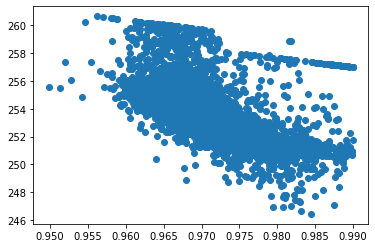

In [35]:
import matplotlib.pyplot as plt

plt.scatter(data['ZonalSt_13.MEAN'], data['TempK_modeled'])

In [36]:
data.TempK_modeled.corr(data['ZonalSt_13.MEAN'])

-0.6399280868480464

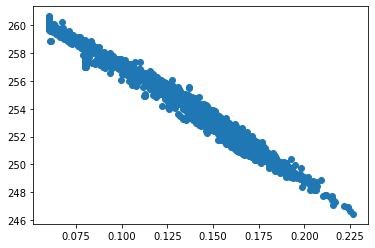

In [37]:
plt.scatter(data['albedo'], data['TempK_modeled'])

In [38]:
data.TempK_modeled.corr(data['albedo'])

-0.9849853723605179

In [39]:
#bring in the real data and pray

obs_data = pd.read_excel('Tree_cbg_lst.xlsx')

obs_data.head()

,ZonalSt_11.OBJECTID,ZonalSt_11.GEOID20,Temp_K,Temp_F,Temp_C,Temp_STD,L1Urban_Tree_Canopy_by_Census_Block_in_2020.INTPTLAT20,L1Urban_Tree_Canopy_by_Census_Block_in_2020.INTPTLON20,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TOTAL_AC,...,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCAC1120,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCPCT1120,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_AC_15,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_PCT_15,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCAC1520,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCPCT1520,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GIS_ID,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GLOBALID,SHAPE.AREA,SHAPE.LEN
0,1,110010016004000,312.929044,103.602279,39.779044,1.177351,38.993490,-77.038640,4227,10.67,...,-0.56,-5.287320,5.32,49.859419,-0.27,-2.569419,UTC_BlockPly_2020_4227,{93900AAC-7225-49D3-831A-D41D1132A0BD},0,0
1,2,110010016004004,308.646259,95.893266,35.496259,0.658267,38.989702,-77.043487,4359,17.63,...,-1.44,-8.265744,14.76,84.778863,-0.53,-3.038863,UTC_BlockPly_2020_4359,{CDF979AE-F8E6-4B74-B6AE-66DC7E4A674A},0,0
2,3,110010016004001,313.892300,105.336140,40.742300,1.125018,38.993574,-77.039715,3545,9.81,...,-0.77,-7.870571,3.43,34.964322,0.14,1.405678,UTC_BlockPly_2020_3545,{DBF7BACC-1E6B-4EF6-9B1D-B687839A71D3},0,0
3,4,110010016004003,312.175045,102.245081,39.025045,1.396902,38.993422,-77.042266,508,6.41,...,0.04,0.578471,2.33,36.349454,0.16,2.450546,UTC_BlockPly_2020_508,{25AC2541-A6DA-44B9-9D24-C180B596D5A4},0,0
4,5,110010016004002,314.902452,107.154413,41.752452,0.337485,38.992901,-77.040341,78,4.77,...,-0.38,-8.074759,1.03,21.593291,0.14,2.826709,UTC_BlockPly_2020_78,{66EDF9C5-B0A2-4300-9A84-FEF3D6DF01F8},0,0


In [40]:
joined_data = obs_data.join(other=data,
                            on='L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID',
                           lsuffix = 'OBS_DATA')
joined_data.head()

,ZonalSt_11.OBJECTID,ZonalSt_11.GEOID20,Temp_K,Temp_F,Temp_C,Temp_STD,L1Urban_Tree_Canopy_by_Census_Block_in_2020.INTPTLAT20OBS_DATA,L1Urban_Tree_Canopy_by_Census_Block_in_2020.INTPTLON20OBS_DATA,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,L1Urban_Tree_Canopy_by_Census_Block_in_2020.TOTAL_ACOBS_DATA,...,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_AC_15,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTC_PCT_15,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCAC1520,L1Urban_Tree_Canopy_by_Census_Block_in_2020.UTCPCT1520,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GIS_ID,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GLOBALID,SHAPE.AREA,SHAPE.LEN,albedo,TempK_modeled
0,1,110010016004000,312.929044,103.602279,39.779044,1.177351,38.993490,-77.038640,4227,10.67,...,5.32,49.859419,-0.27,-2.569419,UTC_BlockPly_2020_4227,{93900AAC-7225-49D3-831A-D41D1132A0BD},0,0,0.173402,251.116655
1,2,110010016004004,308.646259,95.893266,35.496259,0.658267,38.989702,-77.043487,4359,17.63,...,14.76,84.778863,-0.53,-3.038863,UTC_BlockPly_2020_4359,{CDF979AE-F8E6-4B74-B6AE-66DC7E4A674A},0,0,0.164307,251.110169
2,3,110010016004001,313.892300,105.336140,40.742300,1.125018,38.993574,-77.039715,3545,9.81,...,3.43,34.964322,0.14,1.405678,UTC_BlockPly_2020_3545,{DBF7BACC-1E6B-4EF6-9B1D-B687839A71D3},0,0,0.179323,250.710787
3,4,110010016004003,312.175045,102.245081,39.025045,1.396902,38.993422,-77.042266,508,6.41,...,2.33,36.349454,0.16,2.450546,UTC_BlockPly_2020_508,{25AC2541-A6DA-44B9-9D24-C180B596D5A4},0,0,0.178782,250.575058
4,5,110010016004002,314.902452,107.154413,41.752452,0.337485,38.992901,-77.040341,78,4.77,...,1.03,21.593291,0.14,2.826709,UTC_BlockPly_2020_78,{66EDF9C5-B0A2-4300-9A84-FEF3D6DF01F8},0,0,0.178327,251.002221


In [41]:
joined_data.info

<bound method DataFrame.info of       ZonalSt_11.OBJECTID  ZonalSt_11.GEOID20      Temp_K      Temp_F  \
0                       1     110010016004000  312.929044  103.602279   
1                       2     110010016004004  308.646259   95.893266   
2                       3     110010016004001  313.892300  105.336140   
3                       4     110010016004003  312.175045  102.245081   
4                       5     110010016004002  314.902452  107.154413   
...                   ...                 ...         ...         ...   
5964                 5965     110010109002020  309.616355   97.639439   
5965                 5966     110010109002019  307.229559   93.343206   
5966                 5967     110010109002024  309.287954   97.048318   
5967                 5968     110010109002026  309.555117   97.529211   
5968                 5969     110010109002027  307.150637   93.201147   

         Temp_C  Temp_STD  \
0     39.779044  1.177351   
1     35.496259  0.658267   
2   

Text(0, 0.5, 'Observed')

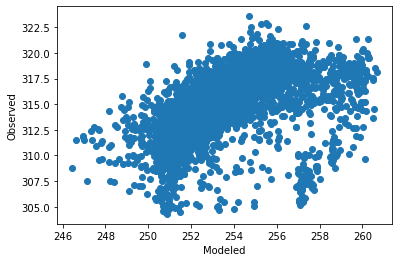

In [42]:
#now we pray

plt.scatter(joined_data['TempK_modeled'], joined_data['Temp_K'])
plt.xlabel('Modeled')
plt.ylabel('Observed')

In [44]:
joined_data.TempK_modeled.corr(joined_data.Temp_K)

0.5241339492613492

<AxesSubplot:>

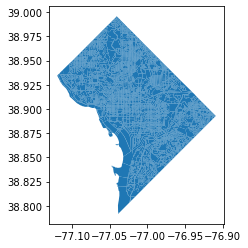

In [45]:
#now bring in the shapefile for the census block groups

import geopandas as gpd
cbs = gpd.read_file('Census_Blocks_in_2020')
cbs.plot()

In [46]:
cbs.head()

,OBJECTID,BLKGRP,BLOCK,GEOID,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,...,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,P0050010,SHAPEAREA,SHAPELEN,geometry
0,1,1,1004,7500000US110010001021004,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-77.06861 38.91704, -77.06793 38.917..."
1,2,1,1006,7500000US110010001021006,265,244,210,6,0,13,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-77.05981 38.91262, -77.05874 38.915..."
2,3,1,1001,7500000US110010001021001,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-77.06732 38.91865, -77.06726 38.918..."
3,4,3,3009,7500000US110010014023009,163,156,133,12,0,5,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-77.07101 38.95735, -77.07091 38.957..."
4,5,1,1009,7500000US110010024001009,60,48,35,10,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-77.02141 38.93770, -77.01950 38.937..."


In [48]:
#try to join this some of the joined data with this by the BLOCK column

#L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID column of joined data

temp_plot_data = joined_data[['Temp_K', 'TempK_modeled', 'albedo', 'ZonalSt_13.MEAN',
                              'L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID']].copy()

temp_plot_data.head()

,Temp_K,TempK_modeled,albedo,ZonalSt_13.MEAN,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID
0,312.929044,251.116655,0.173402,0.976003,4227
1,308.646259,251.110169,0.164307,0.986844,4359
2,313.892300,250.710787,0.179323,0.975301,3545
3,312.175045,250.575058,0.178782,0.978060,508
4,314.902452,251.002221,0.178327,0.971958,78


In [52]:
temp_plot_data.rename(columns={'ZonalSt_13.MEAN':'emissivity'}, inplace=True)
temp_plot_data.head()

,Temp_K,TempK_modeled,albedo,emissivity,L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID
0,312.929044,251.116655,0.173402,0.976003,4227
1,308.646259,251.110169,0.164307,0.986844,4359
2,313.892300,250.710787,0.179323,0.975301,3545
3,312.175045,250.575058,0.178782,0.978060,508
4,314.902452,251.002221,0.178327,0.971958,78


In [55]:
temp_plot_data.set_index('L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID', inplace=True)
temp_plot_data.head()

,Temp_K,TempK_modeled,albedo,emissivity
L1Urban_Tree_Canopy_by_Census_Block_in_2020.GID,,,,
4227,312.929044,251.116655,0.173402,0.976003
4359,308.646259,251.110169,0.164307,0.986844
3545,313.892300,250.710787,0.179323,0.975301
508,312.175045,250.575058,0.178782,0.978060
78,314.902452,251.002221,0.178327,0.971958


In [56]:
cbs.join(other=temp_plot_data, on='BLOCK')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [58]:
cbs['block_int'] = cbs.apply(lambda x: int(x['BLOCK']), axis = 1)
cbs['block_int']

0       1004
1       1006
2       1001
3       3009
4       1009
        ... 
6007    1000
6008    2008
6009    5021
6010    1017
6011    1011
Name: block_int, Length: 6012, dtype: int64

In [67]:
joined_shp = cbs.join(other=temp_plot_data, on='block_int')

In [68]:
joined_shp['Temp_K'].isnull().sum()

9

In [70]:
joined_shp.dropna(how='any', inplace=True)
joined_shp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6003 entries, 0 to 6011
Columns: 324 entries, OBJECTID to emissivity
dtypes: float64(5), geometry(1), int64(312), object(6)
memory usage: 14.9+ MB


<AxesSubplot:>

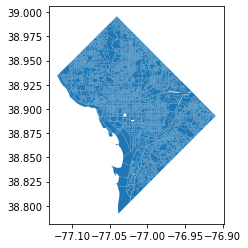

In [71]:
joined_shp.plot()

<AxesSubplot:>

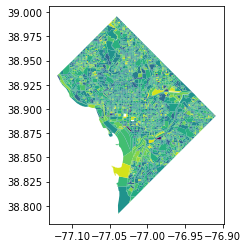

In [72]:
joined_shp.plot(column = 'Temp_K')

<AxesSubplot:>

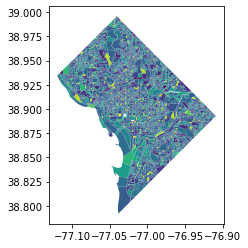

In [73]:
joined_shp.plot(column = 'TempK_modeled')

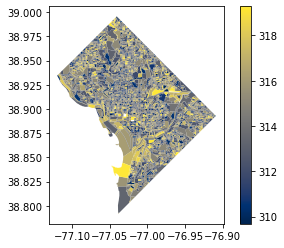

In [82]:
#attempt to more accurately display data

def plot_column(name, cmap = 'cividis'):
    avg = joined_shp[name].mean()
    uncrt = joined_shp[name].std()
    lower = avg-2*uncrt
    upper = avg+2*uncrt
    joined_shp.plot(column=name, vmin=lower, vmax=upper, legend=True, cmap=cmap)
    
plot_column('Temp_K')

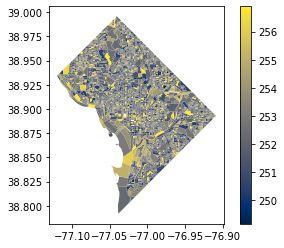

In [83]:
plot_column('TempK_modeled')

In [80]:
#difference column
joined_shp['difference'] = joined_shp.apply(lambda x: x['TempK_modeled']-x['Temp_K'], axis=1)
joined_shp['difference']

0      -62.846646
1      -62.083668
2      -63.007547
3      -63.934556
4      -63.626692
          ...    
6007   -62.348574
6008   -62.001536
6009   -61.295095
6010   -65.072575
6011   -61.031434
Name: difference, Length: 6003, dtype: float64

In [89]:
avg_diff = joined_shp['difference'].mean()
joined_shp['diff_norm'] = joined_shp.apply(lambda x: (x['difference']-avg_diff), axis=1)
joined_shp['diff_norm']

0      -1.398934
1      -0.635956
2      -1.559836
3      -2.486844
4      -2.178981
          ...   
6007   -0.900862
6008   -0.553825
6009    0.152616
6010   -3.624863
6011    0.416278
Name: diff_norm, Length: 6003, dtype: float64

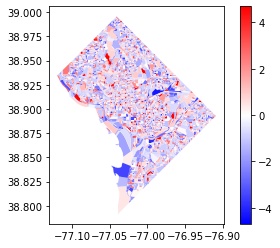

In [90]:
plot_column('diff_norm', cmap = 'bwr')

In [95]:
joined_shp['diff_norm_abs'] = joined_shp.apply(lambda x: np.abs(x['diff_norm']), axis=1)

In [96]:
joined_shp.diff_norm_abs.corr(joined_shp.emissivity)

-0.35295470539083695

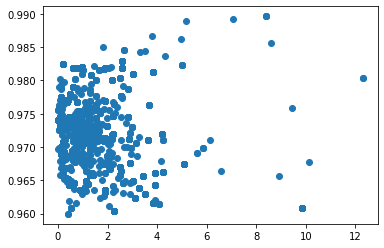

In [99]:
plt.scatter(joined_shp.diff_norm_abs, joined_shp.emissivity)

In [97]:
joined_shp.diff_norm_abs.corr(joined_shp.albedo)

-0.5135269929620694

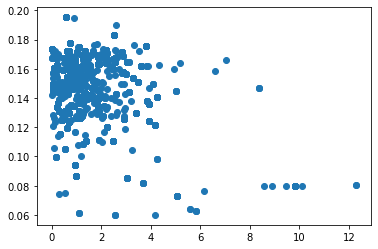

In [98]:
plt.scatter(joined_shp.diff_norm_abs, joined_shp.albedo)

In [102]:
joined_shp['difference'].mean()

-61.44771141129628

In [103]:
joined_shp['difference'].std()

2.3455613788859684

(array([1.000e+00, 0.000e+00, 1.110e+02, 1.990e+02, 4.150e+02, 1.326e+03,
        1.442e+03, 1.325e+03, 6.940e+02, 1.670e+02, 7.700e+01, 3.000e+01,
        1.600e+01, 4.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 1.870e+02,
        0.000e+00, 2.000e+00]),
 array([-68.02177758, -67.07853661, -66.13529564, -65.19205468,
        -64.24881371, -63.30557274, -62.36233177, -61.41909081,
        -60.47584984, -59.53260887, -58.5893679 , -57.64612694,
        -56.70288597, -55.759645  , -54.81640403, -53.87316307,
        -52.9299221 , -51.98668113, -51.04344016, -50.10019919,
        -49.15695823]),
 <BarContainer object of 20 artists>)

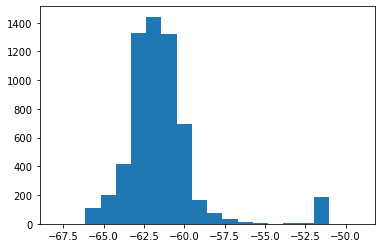

In [104]:
plt.hist(joined_shp['difference'], bins = 20)

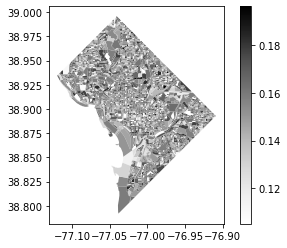

In [105]:
plot_column('albedo', cmap='Greys')

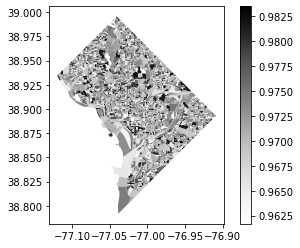

In [106]:
plot_column('emissivity', cmap='Greys')

Text(0.965, 306, 'corr = -0.609')

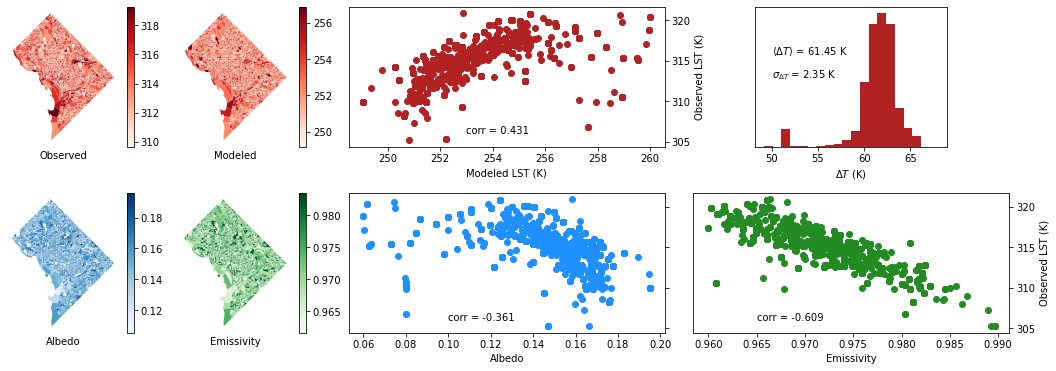

In [182]:
#drawing our big plots

import matplotlib.gridspec as gridspec

def plot_column(name, ax=None, cmap = 'cividis'):
    avg = joined_shp[name].mean()
    uncrt = joined_shp[name].std()
    lower = avg-2*uncrt
    upper = avg+2*uncrt
    joined_shp.plot(column=name, vmin=lower, vmax=upper, legend=True, cmap=cmap, ax=ax)
    
fig = plt.figure(figsize = (18, 6))

gs = gridspec.GridSpec(2,6, hspace = 0.33)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

ax5 = fig.add_subplot(gs[0, 2:4])
ax6 = fig.add_subplot(gs[0, 4:6])
ax7 = fig.add_subplot(gs[1, 2:4])
ax8 = fig.add_subplot(gs[1, 4:6])


#first four panel

plot_column('Temp_K', ax=ax1, cmap = 'Reds')
ax1.set_xticks(ticks = [])
ax1.get_yaxis().set_visible(False)
for key, spine in ax1.spines.items():
    spine.set_visible(False)
ax1.set_xlabel('Observed')

plot_column('TempK_modeled', ax=ax2, cmap = 'Reds')
ax2.set_xticks(ticks = [])
ax2.get_yaxis().set_visible(False)
for key, spine in ax2.spines.items():
    spine.set_visible(False)
ax2.set_xlabel('Modeled')

plot_column('albedo', ax=ax3, cmap = 'Blues')
ax3.set_xticks(ticks = [])
ax3.get_yaxis().set_visible(False)
for key, spine in ax3.spines.items():
    spine.set_visible(False)
ax3.set_xlabel('Albedo')

plot_column('emissivity', ax = ax4, cmap = 'Greens')
ax4.set_xticks(ticks = [])
ax4.get_yaxis().set_visible(False)
for key, spine in ax4.spines.items():
    spine.set_visible(False)
ax4.set_xlabel('Emissivity')

#second four panel

ax5.scatter(joined_shp['TempK_modeled'], joined_shp['Temp_K'], color = 'firebrick')
ax5.set_xlabel('Modeled LST (K)')
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position("right")
ax5.set_ylabel('Observed LST (K)')
ax5.text(253, 306, 'corr = %.3f'%(joined_shp['TempK_modeled'].corr(joined_shp['Temp_K'])))

ax6.hist(-joined_shp['difference'], bins = 20, color = 'firebrick')
ax6.set_aspect(0.01)
ax6.set_xlabel(r'$\Delta T$ (K)')
ax6.text(50, 1000, r'$\langle \Delta T \rangle$ = %2.2f K'%(-joined_shp['difference'].mean()))
ax6.text(50, 750, r'$\sigma_{\Delta T}$ = %2.2f K'%(joined_shp['difference'].std()))
ax6.set_yticks(ticks = [])

ax7.scatter(joined_shp['albedo'], joined_shp['Temp_K'], color = 'dodgerblue')
ax7.set_xlabel('Albedo')
ax7.set_yticks(ticks = [305, 310, 315, 320])
ax7.yaxis.tick_right()
ax7.yaxis.set_ticklabels([])
ax7.text(0.10, 306, 'corr = %.3f'%(joined_shp['Temp_K'].corr(joined_shp['albedo'])))

ax8.scatter(joined_shp['emissivity'], joined_shp['Temp_K'], color = 'forestgreen')
ax8.set_xlabel('Emissivity')
ax8.yaxis.tick_right()
ax8.yaxis.set_label_position("right")
ax8.set_ylabel('Observed LST (K)')
ax8.text(0.965, 306, 'corr = %.3f'%(joined_shp['Temp_K'].corr(joined_shp['emissivity'])))

In [169]:
joined_shp['Temp_K'].shape

(6003,)